<a href="https://colab.research.google.com/github/de-code-bot/skin-disease-detection/blob/main/final_file_tech_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading our image to data generator

loading a pre trained model

In [ ]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip = True, preprocessing_function= preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

Preprocessing

In [ ]:
train = train_datagen.flow_from_directory('/content/drive/MyDrive/college/tech project/skin-disease-datasaet/train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32
                                          )

val = val_datagen.flow_from_directory('/content/drive/MyDrive/college/tech project/skin-disease-datasaet/test_set',
                                                 target_size = (224, 224),
                                                 batch_size = 16
                                      )


Found 934 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
def plotImage(img_arr, label):
  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/200)
    plt.show()

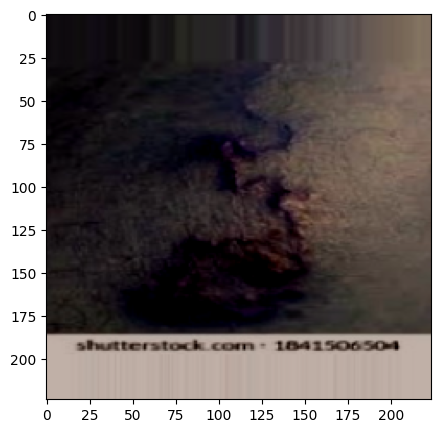

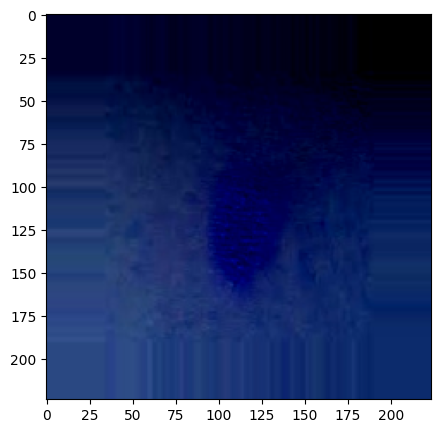

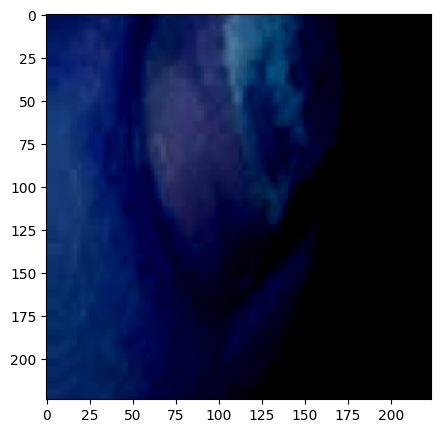

In [ ]:
plotImage(t_img[:3], label[:3])

Building a model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
import keras

In [ ]:
base_model = VGG19(input_shape=(224,224,3), include_top= False)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units= 8 , activation = 'softmax')(x)
model = Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics= ['accuracy'])

Early stopping and checkpoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='accuracy', min_delta= 0.01, patience = 3, verbose = 1)

mc = ModelCheckpoint(filepath="Edureka.h5",
                     monitor='accuracy',
                     min_delta= 0.01,
                     patience = 3,
                     verbose = 1,
                     save_best_only= True)
cb = [es, mc]

training the model

In [ ]:
his = model.fit_generator(train ,
                         steps_per_epoch = 16,
                         epochs= 75,
                         verbose=1,
                         callbacks= cb,
                         validation_data= val,
                         validation_steps =16)

<ipython-input-16-a07608322437>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train ,


Epoch 1/75
16/16 [==============================] - ETA: 0s - loss: 8.7431 - accuracy: 0.4712 


Epoch 1: accuracy improved from -inf to 0.47119, saving model to Edureka.h5
16/16 [==============================] - 449s 28s/step - loss: 8.7431 - accuracy: 0.4712 - val_loss: 4.3650 - val_accuracy: 0.7554
Epoch 2/75


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - ETA: 0s - loss: 3.5245 - accuracy: 0.7366
Epoch 2: accuracy improved from 0.47119 to 0.73663, saving model to Edureka.h5
16/16 [==============================] - 134s 8s/step - loss: 3.5245 - accuracy: 0.7366
Epoch 3/75
16/16 [==============================] - ETA: 0s - loss: 2.6812 - accuracy: 0.8189
Epoch 3: accuracy improved from 0.73663 to 0.81893, saving model to Edureka.h5
16/16 [==============================] - 58s 4s/step - loss: 2.6812 - accuracy: 0.8189
Epoch 4/75
16/16 [==============================] - ETA: 0s - loss: 2.5939 - accuracy: 0.8498
Epoch 4: accuracy improved from 0.81893 to 0.84979, saving model to Edureka.h5
16/16 [==============================] - 26s 2s/step - loss: 2.5939 - accuracy: 0.8498
Epoch 5/75
16/16 [==============================] - ETA: 0s - loss: 2.0105 - accuracy: 0.8724
Epoch 5: accuracy improved from 0.84979 to 0.87243, saving model to Edureka.h5
16/16 [==============================] - 18s 1s/step - lo

In [ ]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

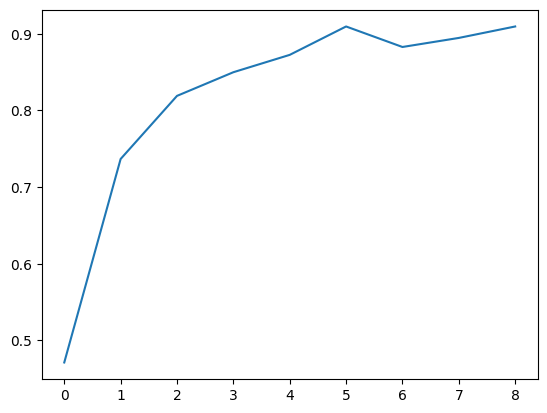

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("accuracy vs v-accuracy")
plt.show()

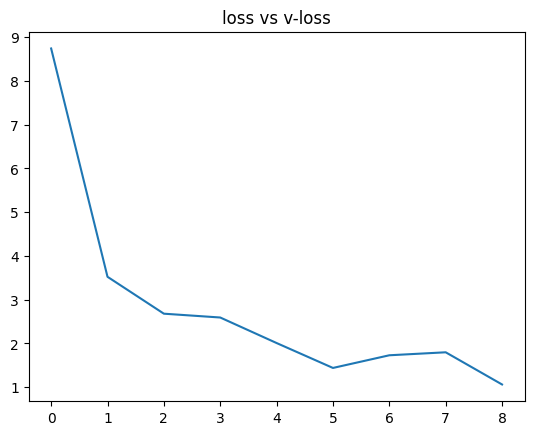

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

///

In [ ]:
from keras.models import load_model
model = load_model("/content/Edureka.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"the acc is {acc*100}%")

<ipython-input-21-73754078cd2d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


the acc is 88.84119987487793%


In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size= (224,224))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"the image is {ref[pred]}")

upload the image to google and copy the path and paste in the path.

In [ ]:
img_path= "/content/drive/MyDrive/college/tech project/chickenpox.jpeg"
prediction(img_path)





1/1 [==============================] - 0s 49ms/step
the image is VI-chickenpox


1/1 [==============================] - 1s 523ms/step
(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)


<ipython-input-25-7edb2bc9000a>:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
<ipython-input-25-7edb2bc9000a>:47: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 8)


<ipython-input-25-7edb2bc9000a>:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure( figsize=(scale * n_features, scale) )


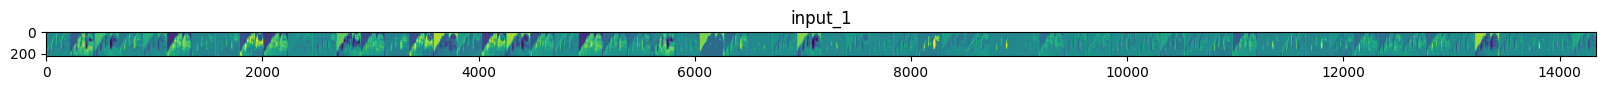

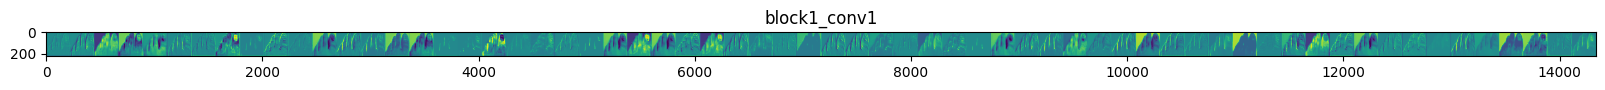

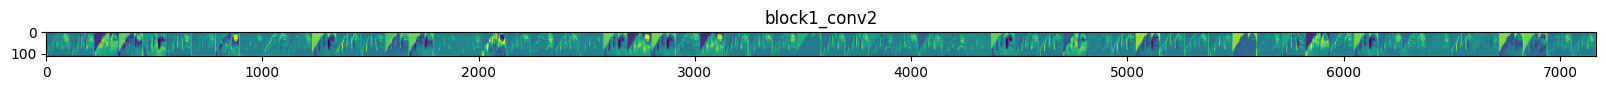

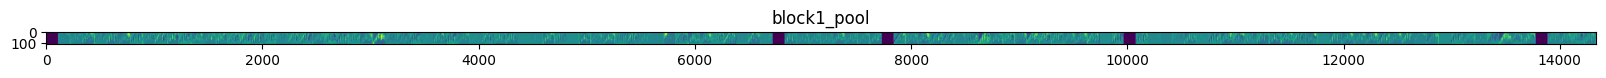

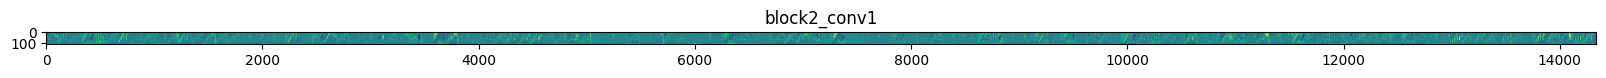

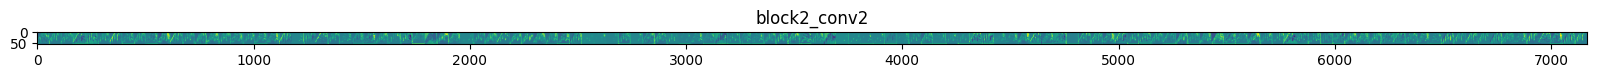

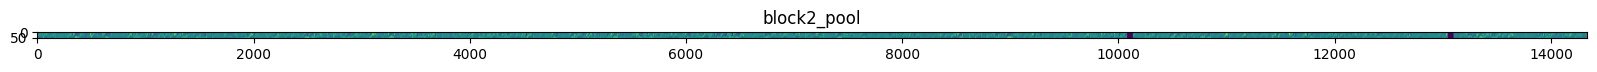

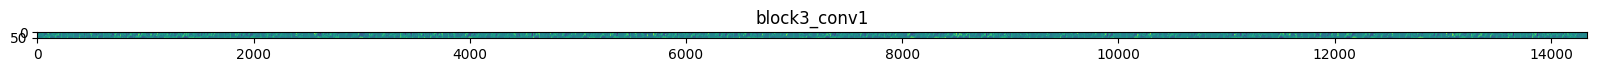

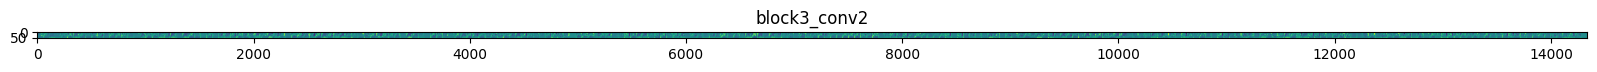

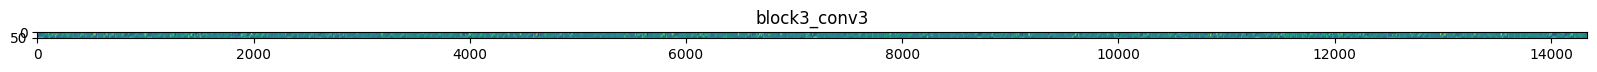

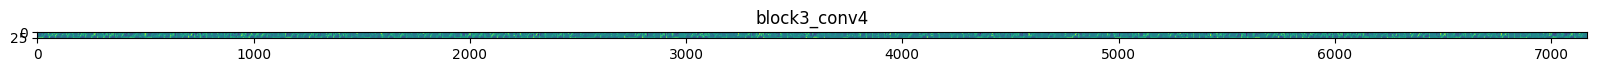

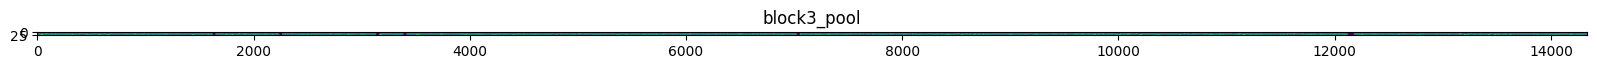

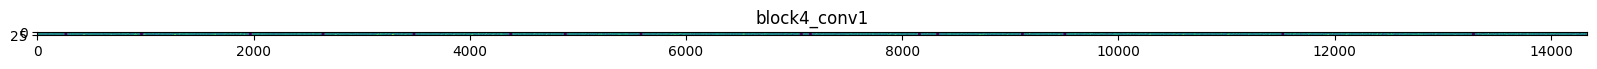

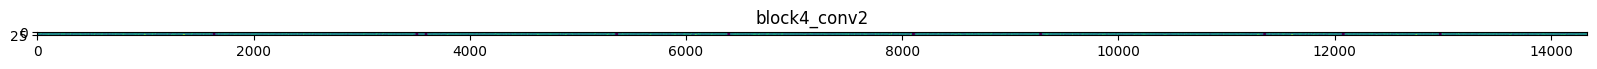

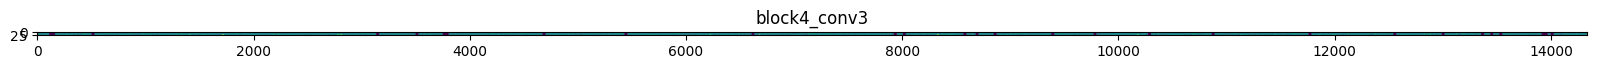

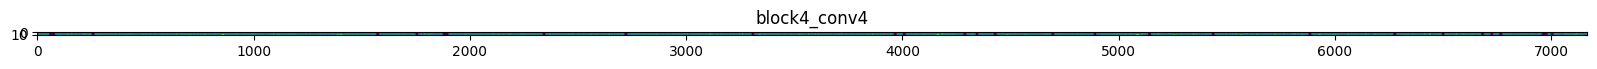

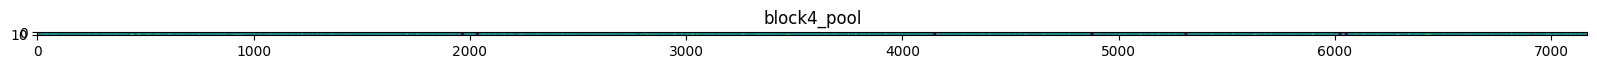

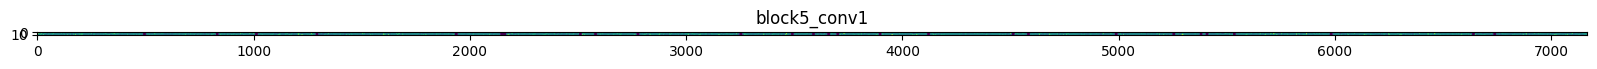

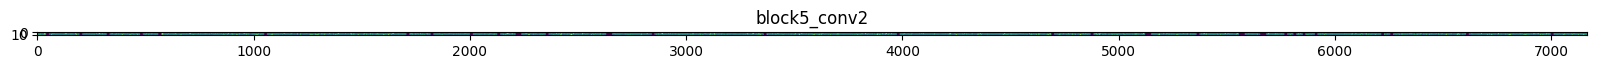

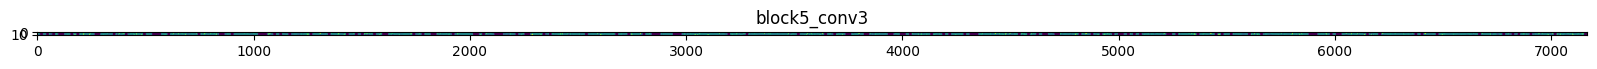

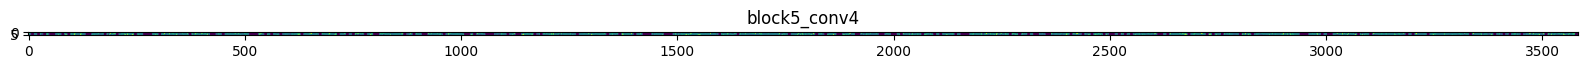

In [ ]:
import tensorflow as tf

# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.

successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#Load the input image
img = load_img(img_path, target_size=(224, 224))

# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)

# Rescale by 1/255
x /= 224.0

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)

# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 2]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )